In [1]:
import numpy as np
import pandas as pd
from dowhy import CausalModel
import graphviz
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
# EconML imports
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')



G=graphviz.Digraph()
G.edge("CDD_category" , "IECC_CLIMATE")
G.edge("CDD_category" , "WSF")
G.edge("CDD_category" , "COOLTYPE")
G.edge("CDD_category" , "THERMAIN")
G.edge("CDD_category" , "Gone_vs_Night")
G.edge("CDD_category" , "USECENAC")
G.edge("CDD_category" , "ROOFTYPE")
G.edge("CDD_category" , "WALLTYPE")
G.edge("CDD_category" , "WINDOWS")
G.edge("CDD_category" , "OA_LAT")
G.edge("CDD_category" , "ADQINSUL")
G.edge("CDD_category" , "ESWIN")
G.edge("CDD_category" , "SMARTMETER")
G.edge("CDD_category" , "INTDATA")
G.edge("CDD_category" , "SOLOTHER")
G.edge("CDD_category" , "KWHCOL")


G.edge("IECC_CLIMATE" , "WSF")
G.edge("IECC_CLIMATE" , "COOLTYPE")
G.edge("IECC_CLIMATE" , "THERMAIN")
G.edge("IECC_CLIMATE" , "Home_vs_Night")
G.edge("IECC_CLIMATE" , "Gone_vs_Night")
G.edge("IECC_CLIMATE" , "USECENAC")
G.edge("IECC_CLIMATE" , "ROOFTYPE")
G.edge("IECC_CLIMATE" , "WALLTYPE")
G.edge("IECC_CLIMATE" , "WINDOWS")
G.edge("IECC_CLIMATE" , "OA_LAT")
G.edge("IECC_CLIMATE" , "ADQINSUL")
G.edge("IECC_CLIMATE" , "AUDIT")
G.edge("IECC_CLIMATE" , "ESWIN")
G.edge("IECC_CLIMATE" , "SMARTMETER")
G.edge("IECC_CLIMATE" , "INTDATA")
G.edge("IECC_CLIMATE" , "SOLOTHER")
G.edge("IECC_CLIMATE" , "KWHCOL")

G.edge("WINDOWS" , "WSF")
G.edge("binned_area" , "WSF")
G.edge("WSF" , "OA_LAT")
G.edge("ESWIN" , "WSF")
G.edge("WSF" , "KWHCOL")

G.edge("NHSLDMEM_category" , "MONEYPY")
G.edge("NHSLDMEM_category" , "COOLTYPE")
G.edge("NHSLDMEM_category" , "Home_vs_Night")
G.edge("NHSLDMEM_category" , "WINDOWS")
G.edge("NHSLDMEM_category" , "TOTROOMS")
G.edge("NHSLDMEM_category" , "binned_area")
G.edge("NHSLDMEM_category" , "TOTCAREA")
G.edge("NHSLDMEM_category" , "ENERGYASST")
G.edge("NHSLDMEM_category" , "KWHCOL")

G.edge("MONEYPY" , "COOLTYPE")
G.edge("MONEYPY" , "THERMAIN")
G.edge("MONEYPY" , "Home_vs_Night")
G.edge("MONEYPY" , "Gone_vs_Night")
G.edge("MONEYPY" , "USECENAC")
G.edge("MONEYPY" , "TYPEHUQ")
G.edge("MONEYPY" , "ROOFTYPE")
G.edge("MONEYPY" , "WALLTYPE")
G.edge("MONEYPY" , "WINDOWS")
G.edge("MONEYPY" , "YEARMADERANGE")
G.edge("MONEYPY" , "TOTROOMS")
G.edge("MONEYPY" , "binned_area")
G.edge("MONEYPY" , "TOTCAREA")
G.edge("MONEYPY" , "ADQINSUL")
G.edge("MONEYPY" , "AUDIT")
G.edge("MONEYPY" , "ESWIN")
G.edge("MONEYPY" , "ELPAY")
G.edge("MONEYPY" , "SMARTMETER")
G.edge("MONEYPY" , "ENERGYASST")
G.edge("MONEYPY" , "SOLOTHER")
G.edge("MONEYPY" , "KWHCOL")

##################
G.edge("COOLTYPE" , "THERMAIN")
G.edge("COOLTYPE" , "Home_vs_Night")
G.edge("COOLTYPE" , "Gone_vs_Night")
G.edge("TYPEHUQ" , "COOLTYPE")
G.edge("YEARMADERANGE" , "COOLTYPE")
G.edge("TOTROOMS" , "COOLTYPE")
G.edge("binned_area" , "COOLTYPE")
G.edge("binned_carea" , "COOLTYPE")
G.edge("COOLTYPE" , "ESWIN")
G.edge("COOLTYPE" , "SMARTMETER")
G.edge("COOLTYPE" , "INTDATA")
G.edge("COOLTYPE" , "ENERGYASST")
G.edge("COOLTYPE" , "KWHCOL")
#######################
G.edge("AGECENAC_category" , "THERMAIN")
G.edge("AGECENAC_category" , "YEARMADERANGE")
G.edge("AGECENAC_category" , "TOTROOMS")
G.edge("AGECENAC_category" , "ESWIN")

########################
G.edge("THERMAIN" , "Home_vs_Night")
G.edge("THERMAIN" , "Gone_vs_Night")
G.edge("THERMAIN" , "USECENAC")
G.edge("TYPEHUQ" , "THERMAIN")
G.edge("YEARMADERANGE" , "THERMAIN")
G.edge("TOTROOMS" , "THERMAIN")
G.edge("binned_area" , "THERMAIN")
G.edge("binned_carea" , "THERMAIN")
G.edge("THERMAIN" , "AUDIT")
G.edge("THERMAIN" , "ESWIN")
G.edge("THERMAIN" , "SMARTMETER")
G.edge("THERMAIN" , "INTDATA")
G.edge("THERMAIN" , "KWHCOL")
###########################

G.edge("USECENAC" , "Home_vs_Night")
G.edge("TYPEHUQ" , "Home_vs_Night")
G.edge("WINDOWS" , "Home_vs_Night")
G.edge("TOTROOMS" , "Home_vs_Night")
G.edge("binned_carea" , "Home_vs_Night")
G.edge("ESWIN" , "Home_vs_Night")
G.edge("ELPAY" , "Home_vs_Night")
G.edge("SMARTMETER" , "Home_vs_Night")
G.edge("INTDATA" , "Home_vs_Night")
G.edge("ENERGYASST" , "Home_vs_Night")
G.edge("SOLOTHER" , "Home_vs_Night")
G.edge("Home_vs_Night" , "KWHCOL")
###########################

G.edge("USECENAC" , "Gone_vs_Night")
G.edge("TYPEHUQ" , "Gone_vs_Night")
G.edge("WINDOWS" , "Gone_vs_Night")
G.edge("TOTROOMS" , "Gone_vs_Night")
G.edge("binned_area" , "Gone_vs_Night")
G.edge("binned_carea" , "Gone_vs_Night")
G.edge("OA_LAT" , "Gone_vs_Night")
G.edge("ESWIN" , "Gone_vs_Night")
G.edge("INTDATA" , "Gone_vs_Night")
G.edge("ENERGYASST" , "Gone_vs_Night")
G.edge("SOLOTHER" , "Gone_vs_Night")
G.edge("Gone_vs_Night" , "KWHCOL")

########################

G.edge("TYPEHUQ" , "USECENAC")
G.edge("WINDOWS" , "USECENAC")
G.edge("YEARMADERANGE" , "USECENAC")
G.edge("TOTROOMS" , "USECENAC")
G.edge("binned_area" , "USECENAC")
G.edge("binned_carea" , "USECENAC")
G.edge("OA_LAT" , "USECENAC")
G.edge("AUDIT" , "USECENAC")
G.edge ("ESWIN" , "USECENAC")
G.edge("ELPAY" , "USECENAC")
G.edge("SMARTMETER" , "USECENAC")
G.edge("INTDATA" , "USECENAC")
G.edge("ENERGYASST" , "USECENAC")
G.edge("USECENAC" , "KWHCOL")

#######################

G.edge("TYPEHUQ" , "ROOFTYPE")
G.edge("TYPEHUQ" , "WALLTYPE")
G.edge("TYPEHUQ" , "TOTROOMS")
G.edge("TYPEHUQ" , "binned_area")
G.edge("TYPEHUQ" , "binned_carea")
G.edge("TYPEHUQ" , "OA_LAT")
G.edge("TYPEHUQ" , "ADQINSUL")
G.edge("TYPEHUQ" , "AUDIT"),
G.edge("TYPEHUQ" , "ESWIN")
G.edge("TYPEHUQ" , "ELPAY")
G.edge("TYPEHUQ" , "SMARTMETER")
G.edge("TYPEHUQ" , "INTDATA")
G.edge("TYPEHUQ" , "ENERGYASST")
G.edge("TYPEHUQ" , "SOLOTHER")
G.edge("TYPEHUQ" , "KWHCOL")

#######################
G.edge("YEARMADERANGE" , "ROOFTYPE")
G.edge("ROOFTYPE" , "OA_LAT")
G.edge("ROOFTYPE" , "ADQINSUL")
G.edge("ROOFTYPE" , "KWHCOL")

#######################
G.edge("YEARMADERANGE" , "WALLTYPE")
G.edge("WALLTYPE" , "OA_LAT")
G.edge("WALLTYPE" , "ADQINSUL")
G.edge("WALLTYPE" , "KWHCOL")
######################

G.edge("TOTROOMS" , "WINDOWS")
G.edge("binned_area" , "WINDOWS")
G.edge("binned_carea" , "WINDOWS")
G.edge("WINDOWS" , "ADQINSUL")
G.edge("WINDOWS" , "ESWIN")
G.edge("WINDOWS" , "KWHCOL")

#########################

G.edge("YEARMADERANGE" , "OA_LAT")
G.edge("YEARMADERANGE" , "ADQINSUL")
G.edge("YEARMADERANGE" , "AUDIT")
G.edge("YEARMADERANGE" , "ESWIN")
G.edge("YEARMADERANGE" , "SMARTMETER")
G.edge("YEARMADERANGE" , "KWHCOL")

############################

G.edge("binned_area" , "TOTROOMS")
G.edge("TOTROOMS" , "binned_carea")
G.edge("TOTROOMS" , "AUDIT")
G.edge("TOTROOMS" , "ESWIN")
G.edge("TOTROOMS" , "ENERGYASST")
G.edge("TOTROOMS" , "SOLOTHER")
G.edge("TOTROOMS" , "KWHCOL")

#########################

G.edge("binned_area" , "binned_carea")
G.edge("binned_area" , "AUDIT")
G.edge("binned_area" , "ESWIN")
G.edge("binned_area" , "SMARTMETER")
G.edge("binned_area" , "INTDATA")
G.edge("binned_area" , "ENERGYASST")
G.edge("binned_area" , "KWHCOL")

######################

G.edge("binned_carea" , "AUDIT")
G.edge("binned_carea" , "ESWIN")
G.edge("binned_carea" , "SMARTMETER")
G.edge("binned_carea" , "INTDATA")
G.edge("binned_carea" , "ENERGYASST")
G.edge("binned_carea" , "SOLOTHER")
G.edge("binned_carea" , "KWHCOL")

##################

G.edge("OA_LAT" , "KWHCOL")

#######################

G.edge("ESWIN" , "ADQINSUL")
G.edge("ADQINSUL" , "KWHCOL")

###########################

G.edge("AUDIT" , "ESWIN")
G.edge("AUDIT" , "SMARTMETER")
G.edge("AUDIT" , "INTDATA")
G.edge("AUDIT" , "ENERGYASST")
G.edge("AUDIT" , "SOLOTHER")
G.edge("AUDIT" , "KWHCOL")
############################

G.edge("ESWIN" , "SMARTMETER")
G.edge("ESWIN" , "INTDATA")
G.edge("ESWIN" , "ENERGYASST")
G.edge("ESWIN" , "KWHCOL")

####################
G.edge("ELPAY" , "SMARTMETER")
G.edge("ELPAY" , "INTDATA")
G.edge("ELPAY" , "SOLOTHER")
G.edge("ELPAY" , "KWHCOL")

#########################
G.edge("SMARTMETER" , "INTDATA")
G.edge("SOLOTHER" , "SMARTMETER")
G.edge("SMARTMETER" , "KWHCOL")

########################

G.edge("INTDATA" , "KWHCOL")

####################

G.edge("ENERGYASST" , "SOLOTHER")
G.edge("ENERGYASST" , "KWHCOL")
#########################
#########################################

# print(dot.source)

G.format = 'pdf'
G.render(directory='DAG', view = False).replace('\\', '/')



'DAG/Digraph.gv.pdf'

In [2]:
data = pd.read_excel("data.xlsx")

In [3]:
data.columns

Index(['CDD65', 'DBT', 'IECC_CLIMATE', 'WSF', 'HHAGE', 'MONEYPY', 'NHSLDMEM',
       'COOLTYPE', 'AGECENAC', 'WWACAGE', 'NUMBERAC', 'TYPEHUQ', 'ATTIC',
       'ATTICFIN', 'PRKGPLC1', 'STUDIO', 'WALLTYPE', 'ROOFTYPE', 'WINDOWS',
       'YEARMADERANGE', 'TOTROOMS', 'TOTAREA', 'TOTCAREA', 'CELLAR', 'STORIES',
       'OA_LAT', 'ADQINSUL', 'ATTCCOOL', 'BASECOOL', 'TEMPHOMEAC',
       'TEMPGONEAC', 'TEMPNITEAC', 'USECENAC', 'USEWWAC', 'SOLAR', 'THERMAIN',
       'PROTHERM', 'AUDIT', 'AUDITCHG', 'ESWIN', 'SMARTTHERM', 'ELPAY',
       'SMARTMETER', 'INTDATA', 'ENERGYASST', 'SOLOTHER', 'KWHCOL', 'EUI',
       'TEMPNITEAC-TEMPHOMEAC', 'TEMPNITEAC-TEMPGONEAC', 'Home_vs_Night',
       'Gone_vs_Night', 'CDD_category', 'Income_category', 'NHSLDMEM_category',
       'AGECENAC_category', 'WWACAGE_category'],
      dtype='object')

In [17]:
data_for_causal = data[['CDD_category','IECC_CLIMATE','WSF','NHSLDMEM_category','MONEYPY','COOLTYPE','AGECENAC_category','THERMAIN','Home_vs_Night','Gone_vs_Night','USECENAC','TYPEHUQ','ROOFTYPE',
                        'WALLTYPE','WINDOWS','YEARMADERANGE','TOTROOMS','TOTAREA','TOTCAREA','OA_LAT','ADQINSUL','AUDIT','ESWIN','ELPAY','SMARTMETER','INTDATA','ENERGYASST','SOLOTHER','KWHCOL']]

In [5]:
bin_labels = [1,2,3,4,5,6,7,8]
data_for_causal['binned_area'] = pd.cut(data_for_causal['TOTAREA'], bins=8, labels=bin_labels)
data_for_causal['binned_carea'] = pd.cut(data_for_causal['TOTCAREA'], bins=8, labels=bin_labels)

data_for_causal = data_for_causal.drop(labels=['TOTAREA','TOTCAREA'], axis=1)


In [18]:
who_pays = data_for_causal.copy()
who_pays = who_pays.loc[(who_pays['ELPAY'] != 9)]
who_pays.groupby(['ELPAY'])['TOTCAREA'].mean()

ELPAY
1    164.031134
2     63.973656
3     85.779070
Name: TOTCAREA, dtype: float64

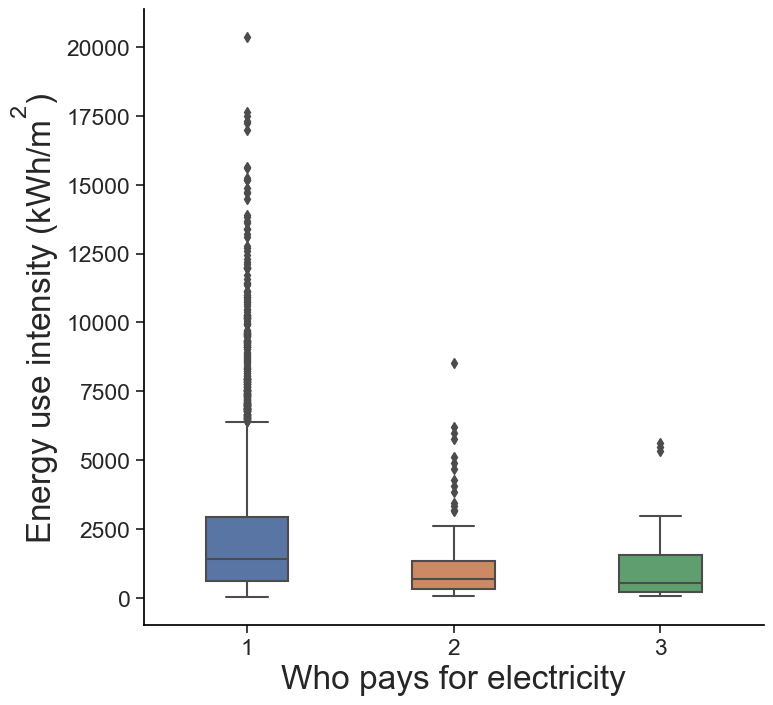

In [7]:
# PROPS = {
#     'boxprops':{'facecolor':'none', 'edgecolor':'black'},
#     'medianprops':{'color':'black'},
#     'whiskerprops':{'color':'black'},
#     'capprops':{'color':'black'}
# }

plt.figure(figsize=(8,8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale=1.5)
plt.rcParams["axes.edgecolor"] = "black"
# draw = sns.violinplot(x = temp['IECC_CLIMATE'], y = temp['KWHCOL'], hue=temp['TEMP_CHANGE'])
draw = sns.boxplot(x = who_pays['ELPAY'], y = who_pays['KWHCOL'], width=0.4)
draw.set_xlabel("Who pays for electricity",fontsize=24)
draw.set_ylabel("Energy use intensity (kWh/$\mathregular{m^2}$)",fontsize=24)
# draw.set(ylim=(0, 25000))
figure = draw.get_figure()
figure.savefig('who_pays.png', bbox_inches='tight', dpi=300)

In [14]:
filtered_data = who_pays.loc[(who_pays['ELPAY'] == 2) | (who_pays['ELPAY'] == 3)]
filtered_data["ELPAY"] = filtered_data['ELPAY'].replace([2, 3], [0, 1])
filtered_data.groupby(['ELPAY'])['KWHCOL'].count()

ELPAY
0    186
1     43
Name: KWHCOL, dtype: int64

In [15]:
# Initializing causal model
model = CausalModel(data=filtered_data,
                     graph=G.source.replace("\t", ' ').replace("\n", ' '),
                     treatment="ELPAY",
                     outcome="KWHCOL")

# Identifying the estimation method
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                               
────────(E[KWHCOL|TYPEHUQ,MONEYPY])
d[ELPAY]                           
Estimand assumption 1, Unconfoundedness: If U→{ELPAY} and U→KWHCOL then P(KWHCOL|ELPAY,TYPEHUQ,MONEYPY,U) = P(KWHCOL|ELPAY,TYPEHUQ,MONEYPY)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [16]:
random_state = 120
dml_estimate = model.estimate_effect(identified_estimand,
                                     method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                     target_units = 'ate',
                                     confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(random_state=random_state, learning_rate=0.0001),
                                                              'model_t': GradientBoostingRegressor(random_state=random_state, learning_rate=0.0001),
                                                              "model_final":LassoCV(fit_intercept=False, random_state=random_state),
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=True),
                                                              'random_state':random_state},
                                               "fit_params":{}})
print(dml_estimate.value)

0.0


In [ ]:
# dml_estimate.test_stat_significance()

In [ ]:
# Random cause
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause", random_seed=random_state)
print(res_random)

# Add Unobserved Common Causes
res_unobserved=model.refute_estimate(identified_estimand, dml_estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02, random_seed=random_state)
print(res_unobserved)

# Placebo Treatment
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", random_seed=random_state)
print(res_placebo)


# Data Subsets Validation
res_subset=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="data_subset_refuter", subset_fraction=0.8,
        num_simulations=10, random_seed=random_state)
print(res_subset)

# # Boostrap Validation
# res_bootstrap=model.refute_estimate(identified_estimand, dml_estimate,
#         method_name="bootstrap_refuter", random_seed=random_state)
# print(res_bootstrap)